# Intro

## REQUERIMENTS
torch
torchvision
httpimport
scipy
sklearn
minepy

# Primera red


criminalidad
Media 3.613523557312254
Cuantiles {0: 0.00632, 0.25: 0.08204499999999999, 0.5: 0.25651, 0.75: 3.6770825, 1: 88.9762}
Desviación típica 8.59304135129577

residencial
Media 11.363636363636363
Cuantiles {0: 0.0, 0.25: 0.0, 0.5: 0.0, 0.75: 12.5, 1: 100.0}
Desviación típica 23.29939569476613

industrial
Media 11.13677865612648
Cuantiles {0: 0.46, 0.25: 5.19, 0.5: 9.69, 0.75: 18.1, 1: 27.74}
Desviación típica 6.853570583390874

rio
Media 0.0691699604743083
Cuantiles {0: 0.0, 0.25: 0.0, 0.5: 0.0, 0.75: 0.0, 1: 1.0}
Desviación típica 0.2537429349603471

polucion
Media 0.5546950592885376
Cuantiles {0: 0.385, 0.25: 0.449, 0.5: 0.538, 0.75: 0.624, 1: 0.871}
Desviación típica 0.11576311540656137

habitaciones
Media 6.284634387351779
Cuantiles {0: 3.561, 0.25: 5.8854999999999995, 0.5: 6.2085, 0.75: 6.6235, 1: 8.78}
Desviación típica 0.7019225143345689

casas-viejas
Media 68.57490118577076
Cuantiles {0: 2.9, 0.25: 45.025, 0.5: 77.5, 0.75: 94.07499999999999, 1: 100.0}
Desviación típica 

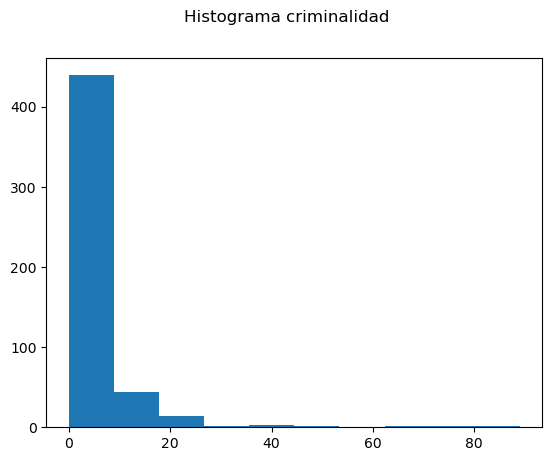

/home/ubu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6477: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


KeyboardInterrupt: 

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
"""
Perceptrón para estimar precio de viviendas. Una capa oculta con 5 procesadores con activación tangente hiperbólica y error cuadrático.
Dependencias: torch, minepy, captum, httpimport
"""
import httpimport

analisisprevio=True
parteazar=0.4
parteajuste=0.7
partevalidacion=0.15
modelo='lineal'
ocultos=4
nolineal='ReLU'
funcionfinal='Sigmoid'
velocidad=0.1
analizaresiduos=False
verejemplos=False

###################################################################################################
with httpimport.remote_repo('https://personales.unican.es/crespoj/redes/redespytorch.zip'):
    import lectura
    import preproceso
    import particion
    import tipored
    import ajuste
    import registro
    import lecturaurl
    from torch import nn
    import activaciones

#Cargamos los datos, todos
datos=lecturaurl.leelistas('practica1/casas.trn.txt')
numentradas=len(datos[0])-1
varnoms=['criminalidad','residencial','industrial','rio','polucion','habitaciones','casas-viejas','distancia-trabajo',
         'autovias','impuestos','ratio-aula','negr@s','pobreza','precio']

#Descripción numÃ©rica
if analisisprevio:
    lectura.estadistica(varnoms,datos)

#Descripción gráfica
frel,vals=lectura.grafica(varnoms,datos,analisisprevio)

#Preproceso a distribución normal media 0 varianza 1. Hay otras posibilidades. Mira el fichero preproceso
datot=preproceso.mediavar(datos)

#Conjuntos de ajuste, validación y muestra. Parte al azar y parte por agrupamiento
tea,tsa,tev,tsv,tep,tsp=particion.azaryestrat(datot,parteazar,parteajuste,partevalidacion)

def modula(mod):
    if mod in dir(nn):
        return getattr(nn,mod)
    if mod in dir(activaciones):
        return getattr(activaciones,mod)
    return mod

nolineal=modula(nolineal)
funcionfinal=modula(funcionfinal)
argums={'lineal':(numentradas,1),'cuasilineal':(numentradas,ocultos,1),'perceptron':(numentradas,[ocultos],1,nolineal,funcionfinal)}
red=getattr(tipored,modelo)(*(argums[modelo]))
#).cuda(device)
print(red)
print('\nAjuste')
err,red,_=ajuste.ajustar(red,tea,tsa,tev,tsv,tep,tsp,kaj=velocidad)
print('Error medio cuadrático final en conjunto de prueba',err.item())
red.eval()
tepor=registro.residuos(tep,tsp,red,analizaresiduos)

if verejemplos:
#Vemos un caso concreto
    registro.sacarejemplos(tep,tsp,tepor,varnoms,frel,vals,red,False)
